## Short Study

The purpose of this short study is to look at what has happened to GME over the last 2 years. 

## Data
We are going to look at data from FINRA **RegSHO** available:  at http://regsho.finra.org/

There are 5 sources of data:
* CNMS:
* FNQC:
* FNRA:
* FNSQ:
* FNYX: 

We are going to look at the data that we pulled from regSHO listings. 

### Process data
We are going to:
1. iterate through all of the files, 
1. load the data into pandas data frame
1. pull the **GME** row
1. add it to the CNMS pandas dataframe 


In [1]:
import fnmatch
import os
import pandas as pd

# Generate dates to pull logs with
x = pd.date_range(start='20190101',end='20210801',freq='D').strftime('%Y%m%d')

sdir ='shortdata/'

xxx = []
for shortdate in x:
    #print(shortdate)
    for file in os.listdir(sdir):
        matchme = 'CNMSshvol'+str(shortdate)+'*'
        if fnmatch.fnmatch(file, matchme):
            xxx.append(file)

df = None            

for filename in xxx:
    f = open(sdir+filename)
    try:
        fullfile = pd.read_csv(f,sep="|")
        if df is None:
            gmerow = fullfile.loc[fullfile['Symbol'] == 'GME']
            df = gmerow

        else:
            gmerow = fullfile.loc[fullfile['Symbol'] == 'GME']
            df = df.append(gmerow)
    except:
        print('failed: {}'.format(filename))
CNMS = df 
print('Finished')
CNMS.head()

Finished


,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market
3074,20190102,GME,266858.0,0.0,529621.0,"Q,N"
3052,20190103,GME,203573.0,2100.0,471602.0,"Q,N"
3039,20190104,GME,3723340.0,1584.0,5218886.0,"Q,N"
3060,20190107,GME,631100.0,1184.0,1227566.0,"Q,N"
3057,20190108,GME,631902.0,1128.0,1279886.0,"Q,N"


### Visualization

Now that we have the data for every day in the dataframe, we need to plot it to see what it looks like. 


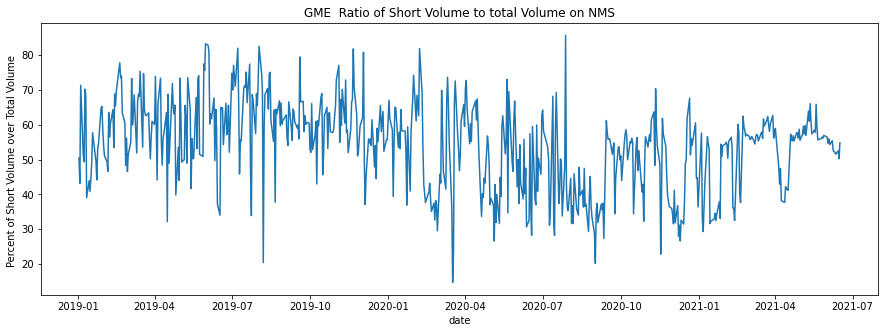

In [2]:
# Change the date format from YYYYMMDD to matplotlib compliant 
import datetime as dt
date_fmt ='%Y%m%d'

raw_x = CNMS['Date']
CNMS_dt = [dt.datetime.strptime(str(i), date_fmt) for i in raw_x]


# import matplotlib to use. 
from matplotlib import pyplot as plt 

# Make the plot the right size 
plt.figure(figsize=(15,5))

# Pull the Short Volume and Total Volume 
CNMS_sv = CNMS['ShortVolume']
CNMS_tv = CNMS['TotalVolume']

# Calculate the ratio of Short Sales to Total Volume 
CNMS_y = CNMS_sv/CNMS_tv*100


# Make a plot 
plt.plot(CNMS_dt,CNMS_y)


plt.xlabel('date')
plt.ylabel('Percent of Short Volume over Total Volume ')
plt.title('GME  Ratio of Short Volume to total Volume on {}'.format('NMS'))
plt.show()

### Now we can add another source of data

In [3]:
xxx = []
for shortdate in x:
    #print(shortdate)
    for file in os.listdir(sdir):
        matchme = 'FNYXshvol'+str(shortdate)+'*'
        if fnmatch.fnmatch(file, matchme):
            xxx.append(file)

df = None            

for filename in xxx:
    f = open(sdir+filename)
    try:
        fullfile = pd.read_csv(f,sep="|")
        if df is None:
            gmerow = fullfile.loc[fullfile['Symbol'] == 'GME']
            df = gmerow

        else:
            gmerow = fullfile.loc[fullfile['Symbol'] == 'GME']
            df = df.append(gmerow)
    except:
        print('failed: {}'.format(filename))
FNYX = df 
print('Finished')
FNYX.head()

Finished


,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market
2623,20190102,GME,25655.0,0.0,62594.0,N
2555,20190103,GME,10590.0,0.0,30114.0,N
2588,20190104,GME,1223948.0,533.0,1845423.0,N
2614,20190107,GME,78235.0,0.0,208731.0,N
2582,20190108,GME,66683.0,0.0,201999.0,N


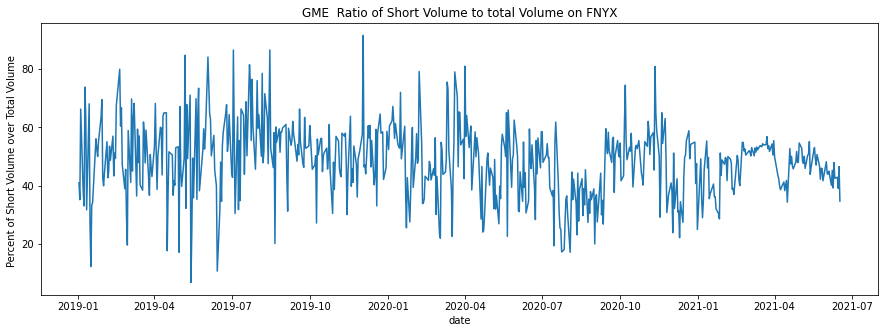

In [4]:
# Change the date format from YYYYMMDD to matplotlib compliant 
import datetime as dt
date_fmt ='%Y%m%d'

raw_x = FNYX['Date']
FNYX_dt = [dt.datetime.strptime(str(i), date_fmt) for i in raw_x]


# import matplotlib to use. 
from matplotlib import pyplot as plt 

# Make the plot the right size 
plt.figure(figsize=(15,5))

# Pull the Short Volume and Total Volume 
FNYX_sv = FNYX['ShortVolume']
FNYX_tv = FNYX['TotalVolume']

# Calculate the ratio of Short Sales to Total Volume 
FNYX_y = FNYX_sv/FNYX_tv*100


# Make a plot 
plt.plot(FNYX_dt,FNYX_y)


plt.xlabel('date')
plt.ylabel('Percent of Short Volume over Total Volume ')
plt.title('GME  Ratio of Short Volume to total Volume on {}'.format('FNYX'))
plt.show()

## Now that we have an idea that 50% of any sales any day are shorts. 
Lets look at actual short and total volume. 

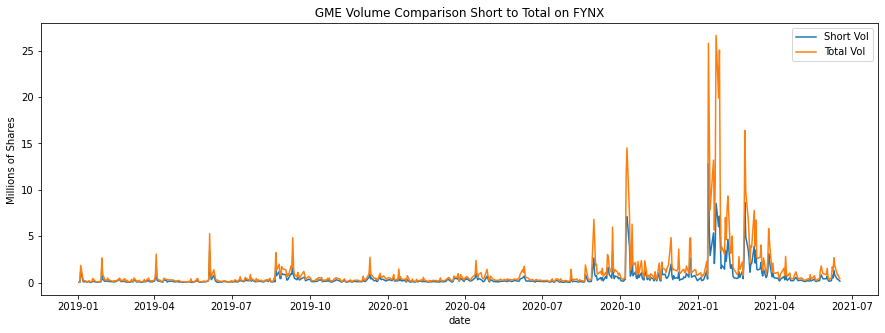

In [16]:
plt.figure(figsize=(15,5))
plt.plot(FNYX_dt,FNYX_sv/1e6,label='Short Vol')
plt.plot(FNYX_dt,FNYX_tv/1e6,label='Total Vol')
plt.xlabel('date')
plt.ylabel('Millions of Shares ')
plt.title(' GME Volume Comparison Short to Total on FYNX ')
plt.legend()

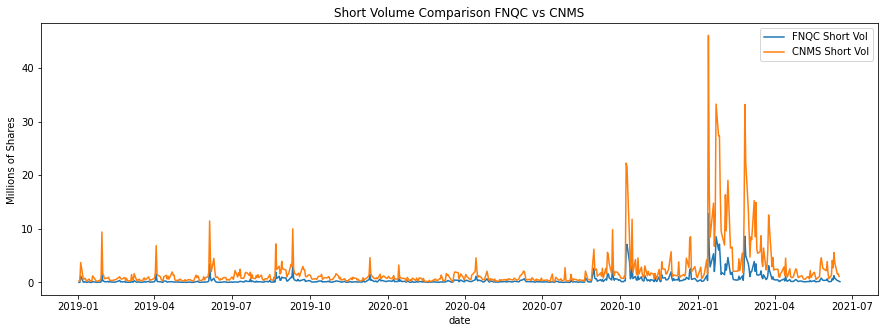

In [17]:
## Lets look at the two exchanges that we have data for
plt.figure(figsize=(15,5))
plt.plot(FNYX_dt,FNYX_sv/1e6,label='FNQC Short Vol')
plt.plot(CNMS_dt,CNMS_sv/1e6,label='CNMS Short Vol')
plt.xlabel('date')
plt.ylabel('Millions of Shares ')
plt.title('Short Volume Comparison FNQC vs CNMS')
plt.legend()

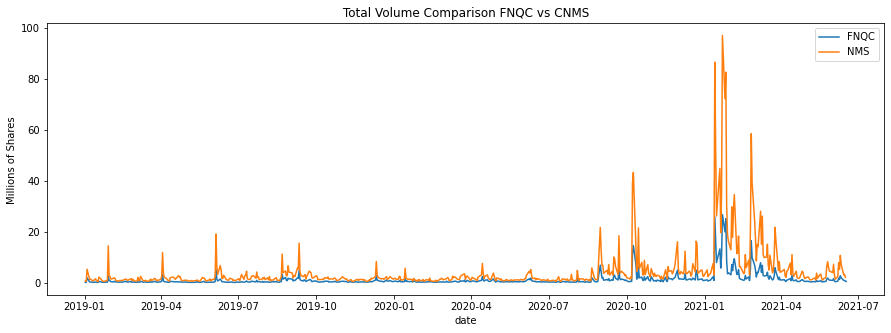

In [18]:
## Lets look at the two exchanges that we have data for
plt.figure(figsize=(15,5))
plt.plot(FNYX_dt,FNYX_tv/1e6,label='FNQC')
plt.plot(CNMS_dt,CNMS_tv/1e6,label='NMS')
plt.xlabel('date')
plt.ylabel('Millions of Shares ')
plt.title(' Total Volume Comparison FNQC vs CNMS ')
plt.legend()